# Plotting a pretty map

Sometimes you want topographic or sattelite imagery for your plots. This short notebook will demonstrate how to:

1. Use different map images from the free arcgis image service
2. annotate maps with text or arrows

In [1]:
% matplotlib inline
from mpl_toolkits.basemap import Basemap

import matplotlib.pyplot as plt

http://server.arcgisonline.com/ArcGIS/rest/services/World_Shaded_Relief/MapServer/export?bbox=-118.50000000000001,33.15,-117.15000000000002,34.5&bboxSR=4269&imageSR=4269&size=2000,2000&dpi=96&format=png32&f=image


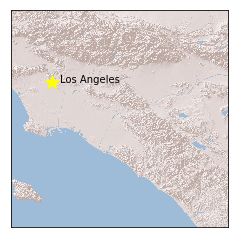

In [2]:
fig, ax = plt.subplots(1)

m = Basemap(llcrnrlon=-118.5,llcrnrlat=33.15,urcrnrlon=-117.15,urcrnrlat=34.5, epsg=4269, ax=ax)
#http://server.arcgisonline.com/arcgis/rest/services
#EPSG Number of America is 4269

m.arcgisimage(service='World_Shaded_Relief', xpixels = 2000, verbose= True)

los_angeles = (-118.2437, 34.0522)

m.plot(los_angeles[0], los_angeles[1], marker='*', markersize=15, color='yellow')

x, y = m(los_angeles[0]+0.05, los_angeles[1])
ax.text(x, y, 'Los Angeles')

http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=138.4,34.9,139.4,36.0&bboxSR=4269&imageSR=4269&size=2000,2200&dpi=96&format=png32&f=image


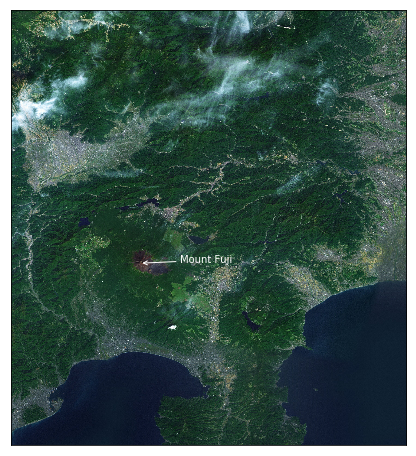

In [3]:
fig, ax = plt.subplots(1, figsize=(8,8))

m = Basemap(llcrnrlon=138.4,llcrnrlat=34.9,urcrnrlon=139.4,urcrnrlat=36, epsg=4269, ax=ax)
#http://server.arcgisonline.com/arcgis/rest/services
#EPSG Number of America is 4269

m.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 2000, verbose= True)

fujisan = (138.7278, 35.3606)
x, y = m(fujisan[0], fujisan[1])
x2, y2 =m(fujisan[0]+.1, fujisan[1])
ax.annotate('Mount Fuji', xy=(x,y), xytext=(x2, y2), xycoords='data', color='White'
            , textcoords='data', arrowprops=dict(arrowstyle="->", color='white'))

In [4]:
print(m.arcgisimage.__doc__)


        Retrieve an image using the ArcGIS Server REST API and display it on
        the map. In order to use this method, the Basemap instance must be
        created using the ``epsg`` keyword to define the map projection, unless
        the ``cyl`` projection is used (in which case the epsg code 4326 is
        assumed).

        .. tabularcolumns:: |l|L|

        ==============   ====================================================
        Keywords         Description
        ==============   ====================================================
        server           web map server URL (default
                         http://server.arcgisonline.com/ArcGIS).
        service          service (image type) hosted on server (default
                         ESRI_Imagery_World_2D, which is NASA 'Blue Marble'
                         image).
        xpixels          requested number of image pixels in x-direction
                         (default 400).
        ypixels          request